<a href="https://colab.research.google.com/github/cabamarcos/SpeechRecognition/blob/main/TrabajoFinalAA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importacion de herramientas

Para comenzar realizaremos todas las importaciones necesarias

In [1]:
!pip install --upgrade linear-tree

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import time

#preprocessing
from sklearn import preprocessing
from sklearn.compose import make_column_selector as selector
from sympy import *
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

#traintest
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


#decisiontrees
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from lineartree import LinearTreeRegressor

#knn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor


#crossval
from sklearn.model_selection import cross_val_score, KFold

#GridSearch/RandomSearch
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#pipeline
from sklearn.pipeline import make_pipeline

#SVM
from sklearn.svm import SVC



# 1. Importacion modelo de datos y Analisis exploratorio de datos

## Implementar modelo de datos

Implementamos el modelo de datos


In [3]:
from google.colab import drive

In [4]:
#drive.mount('/content/drive')

In [5]:
#datos = pd.read_csv("/content/drive/MyDrive/DatostrabajoAA27/disp_st27ns1.txt.bz2", compression = "bz2", index_col = 0)

In [6]:
datos = pd.read_csv("disp_st27ns1.txt.bz2", compression="bz2",index_col=0)
#comp_df = pd.read_csv("comp_st27ns1.txt.bz2",compression="bz2",index_col=0)

##Primeros pasos

Queremos mostrar todos los datos de salida en una gráfica

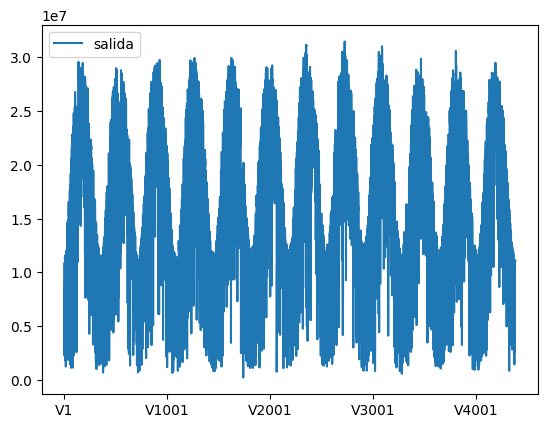

In [7]:
# Crear el gráfico
datos[['salida']].plot()
# Mostrar el gráfico
plt.show()

Vamos a ver el número de columnas y filas

In [8]:
print('Cantidad de filas y columnas: ', datos.shape)
print('Nombre de las columnas: ', datos.columns)

Cantidad de filas y columnas:  (4380, 76)
Nombre de las columnas:  Index(['apcp_sf1_1', 'apcp_sf2_1', 'apcp_sf3_1', 'apcp_sf4_1', 'apcp_sf5_1',
       'dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s4_1', 'dlwrf_s5_1',
       'dswrf_s1_1', 'dswrf_s2_1', 'dswrf_s3_1', 'dswrf_s4_1', 'dswrf_s5_1',
       'pres_ms1_1', 'pres_ms2_1', 'pres_ms3_1', 'pres_ms4_1', 'pres_ms5_1',
       'pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'pwat_ea5_1',
       'spfh_2m1_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 'spfh_2m5_1',
       'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1',
       'tcolc_e1_1', 'tcolc_e2_1', 'tcolc_e3_1', 'tcolc_e4_1', 'tcolc_e5_1',
       'tmax_2m1_1', 'tmax_2m2_1', 'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1',
       'tmin_2m1_1', 'tmin_2m2_1', 'tmin_2m3_1', 'tmin_2m4_1', 'tmin_2m5_1',
       'tmp_2m_1_1', 'tmp_2m_2_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1',
       'tmp_sfc1_1', 'tmp_sfc2_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 'tmp_sfc5_1',
       'u

Tenemos 4380 instancias en total en el dataset disponible, tenemos también, 76 columnas.

In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4380 entries, V1 to V4380
Data columns (total 76 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   apcp_sf1_1  4380 non-null   float64
 1   apcp_sf2_1  4380 non-null   float64
 2   apcp_sf3_1  4380 non-null   float64
 3   apcp_sf4_1  4380 non-null   float64
 4   apcp_sf5_1  4380 non-null   float64
 5   dlwrf_s1_1  4380 non-null   float64
 6   dlwrf_s2_1  4380 non-null   float64
 7   dlwrf_s3_1  4380 non-null   float64
 8   dlwrf_s4_1  4380 non-null   float64
 9   dlwrf_s5_1  4380 non-null   float64
 10  dswrf_s1_1  4380 non-null   float64
 11  dswrf_s2_1  4380 non-null   float64
 12  dswrf_s3_1  4380 non-null   float64
 13  dswrf_s4_1  4380 non-null   float64
 14  dswrf_s5_1  4380 non-null   float64
 15  pres_ms1_1  4380 non-null   float64
 16  pres_ms2_1  4380 non-null   float64
 17  pres_ms3_1  4380 non-null   float64
 18  pres_ms4_1  4380 non-null   float64
 19  pres_ms5_1  4380 non-null   fl

75 de estas columnas tienen datos de tipo coma flotante, excepto la salida, la cual, es de tipo entero.

##Valores estadísticos básicos

Vamos a comprobar los valores estadísticos básicos de cada columna, tales como la media, máximos, mínimos, percetiles... 

In [10]:
datos.describe()

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
count,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,...,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4380.000000,4.380000e+03
mean,0.680864,0.295715,0.560493,0.314416,0.633132,313.273646,315.987828,323.916601,343.364923,342.400159,...,244.622084,249.168372,259.334746,258.017321,0.161146,39.177252,73.645019,117.929556,90.196824,1.563380e+07
std,2.428075,1.150189,2.004093,1.052649,2.046562,55.814758,58.638442,59.902811,63.252590,63.356754,...,37.643788,37.682334,41.063270,40.327808,0.359916,26.040578,31.372578,43.613978,35.478830,8.034871e+06
min,0.000000,0.000000,0.000000,0.000000,0.000000,155.153588,152.214722,156.433634,168.872932,169.850136,...,112.273223,120.532820,108.696960,113.352032,0.000000,0.000000,2.000000,4.181818,2.727273,2.367000e+05
25%,0.000000,0.000000,0.000000,0.000000,0.000000,267.695476,267.413078,275.156984,292.641835,291.756962,...,227.328584,230.584259,239.253765,238.054149,0.000000,14.886364,50.181818,98.181818,65.545455,9.617175e+06
50%,0.000000,0.000000,0.000000,0.000000,0.000000,318.375947,322.670428,329.227325,346.983034,345.283217,...,249.642644,254.083740,266.566240,264.581923,0.000000,36.409091,78.000000,126.090909,95.272727,1.556790e+07
75%,0.151818,0.071136,0.176364,0.074773,0.171136,362.370395,367.887140,377.571733,399.169037,398.387048,...,273.364252,277.758348,289.760780,288.576924,0.000000,62.477273,99.909091,144.636364,118.181818,2.253825e+07
max,49.250909,22.713636,32.225454,14.722727,31.407273,419.721752,425.380085,428.193354,473.704812,467.151586,...,310.361004,315.971533,331.714963,328.803999,1.000000,91.272727,274.272727,547.545455,363.818182,3.145350e+07


##Visualización de datos

Vamos a visualizar las campanas de gauss en johnson, normal y log normal con los datos de salida y ver si cada una de ellas se acerca a nuestros datos

<ipython-input-11-25373f8428d7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.johnsonsu)
<ipython-input-11-25373f8428d7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, kde=False, fit=st.norm)
<ipython-input-11-25373f8428d7>:7: UserWarning: 

`distplot` is a deprecate

<Axes: title={'center': 'Log Normal'}, xlabel='salida'>

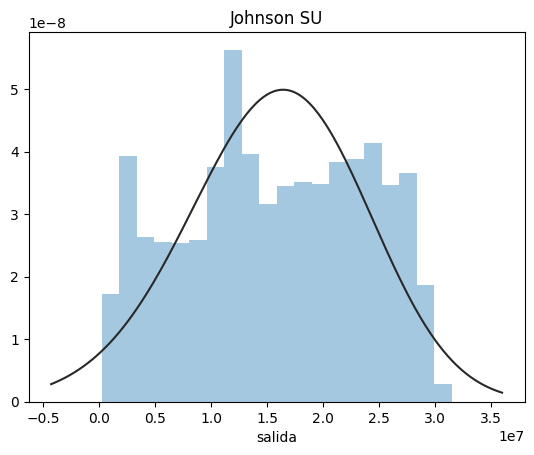

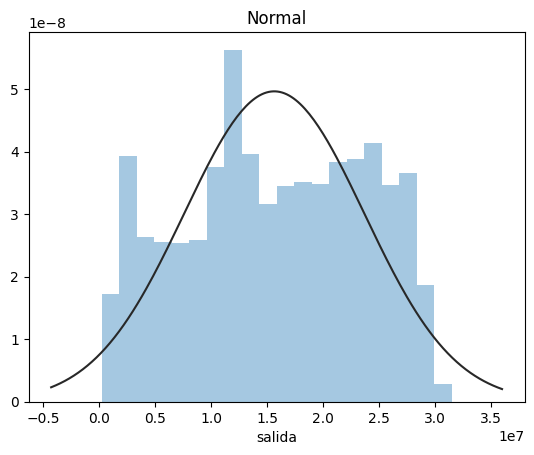

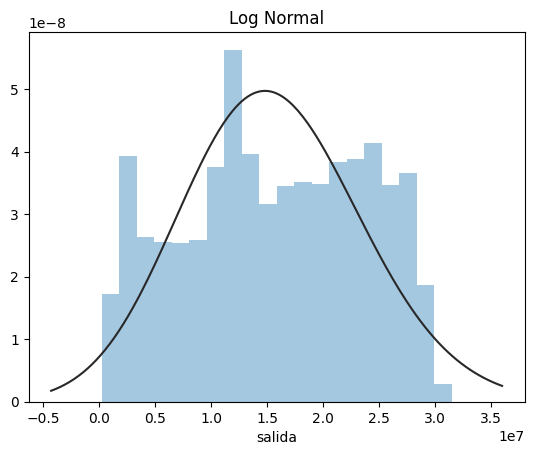

In [11]:
y = datos['salida']
plt.figure(1); plt.title('Johnson SU')
sns.distplot(y, kde=False, fit=st.johnsonsu)
plt.figure(2); plt.title('Normal')
sns.distplot(y, kde=False, fit=st.norm)
plt.figure(3); plt.title('Log Normal')
sns.distplot(y, kde=False, fit=st.lognorm)

##Pairplots

En esta prueba realizamos los pairplots con los datos de salida. Cabe destacar que en las graficas en las que la linea es fina(no hay mucho cambio) se debe a que abundan ceros, como uswrf_s1_1 y dswrf_s1_1. Esta información también nos sirve para poder saber en que atributos se puede reducir la dimensionalidad del problema.

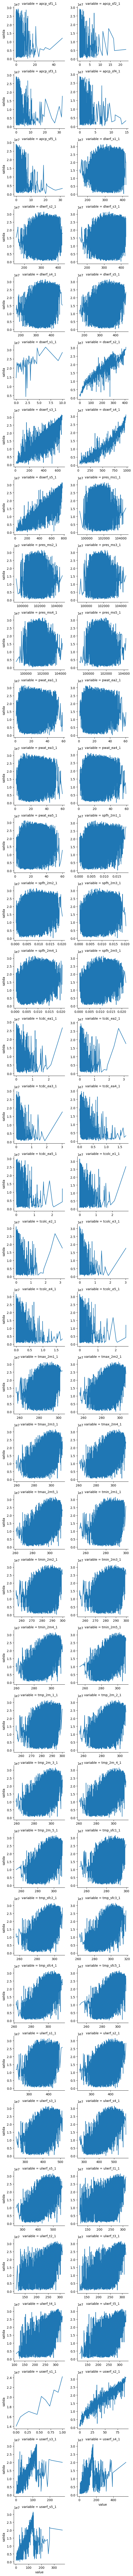

In [12]:
def pairplot(x, y, **kwargs):
  ax = plt.gca()
  ts = pd.DataFrame({'time': x, 'val': y})
  ts = ts.groupby('time').mean()
  ts.plot(ax=ax)
  plt.xticks()

f = pd.melt(datos, id_vars = ['salida'], value_vars = datos)
g = sns.FacetGrid(f, col = "variable", col_wrap = 2, sharex = False, sharey= False)
g= g.map(pairplot, "value", "salida")


## Comprobar valores nulos

A continuacion comprobaremos si existen valores nulos en alguna de las columnas

In [13]:
# Crear un dataframe a partir de la variable 'datos'
df = pd.DataFrame(datos)

# Verificar si hay valores nulos
if df.isnull().values.any():
    print("Hay valores nulos en la matriz.")
else:
    print("No hay valores nulos en la matriz.")

No hay valores nulos en la matriz.


##Valores iguales a cero

In [14]:
# Crear un DataFrame a partir de la variable 'datos'
df = pd.DataFrame(datos)

# Crear un diccionario para almacenar los resultados
ceros = {}

# Contar los valores iguales a cero en cada columna y guardarlos en el diccionario
for columna in df.columns:
    cuenta = np.sum(df[columna] == 0)
    ceros[columna] = cuenta

# Mostrar el diccionario con los contadores de ceros
for columna, cuenta in ceros.items():
    print(f"'{columna}': {cuenta}")

'apcp_sf1_1': 2534
'apcp_sf2_1': 2490
'apcp_sf3_1': 2312
'apcp_sf4_1': 2631
'apcp_sf5_1': 2480
'dlwrf_s1_1': 0
'dlwrf_s2_1': 0
'dlwrf_s3_1': 0
'dlwrf_s4_1': 0
'dlwrf_s5_1': 0
'dswrf_s1_1': 3822
'dswrf_s2_1': 3
'dswrf_s3_1': 0
'dswrf_s4_1': 0
'dswrf_s5_1': 0
'pres_ms1_1': 0
'pres_ms2_1': 0
'pres_ms3_1': 0
'pres_ms4_1': 0
'pres_ms5_1': 0
'pwat_ea1_1': 0
'pwat_ea2_1': 0
'pwat_ea3_1': 0
'pwat_ea4_1': 0
'pwat_ea5_1': 0
'spfh_2m1_1': 0
'spfh_2m2_1': 0
'spfh_2m3_1': 0
'spfh_2m4_1': 0
'spfh_2m5_1': 0
'tcdc_ea1_1': 1584
'tcdc_ea2_1': 1621
'tcdc_ea3_1': 1603
'tcdc_ea4_1': 1443
'tcdc_ea5_1': 1398
'tcolc_e1_1': 2
'tcolc_e2_1': 4
'tcolc_e3_1': 0
'tcolc_e4_1': 0
'tcolc_e5_1': 1
'tmax_2m1_1': 0
'tmax_2m2_1': 0
'tmax_2m3_1': 0
'tmax_2m4_1': 0
'tmax_2m5_1': 0
'tmin_2m1_1': 0
'tmin_2m2_1': 0
'tmin_2m3_1': 0
'tmin_2m4_1': 0
'tmin_2m5_1': 0
'tmp_2m_1_1': 0
'tmp_2m_2_1': 0
'tmp_2m_3_1': 0
'tmp_2m_4_1': 0
'tmp_2m_5_1': 0
'tmp_sfc1_1': 0
'tmp_sfc2_1': 0
'tmp_sfc3_1': 0
'tmp_sfc4_1': 0
'tmp_sfc5_1': 0
'ulwrf_

## Comprobar filas duplicadas

Vamos a comprobar si hay filas duplicadas:




In [15]:
datos.duplicated()

V1       False
V2       False
V3       False
V4       False
V5       False
         ...  
V4376    False
V4377    False
V4378    False
V4379    False
V4380    False
Length: 4380, dtype: bool

Se puede ver, que no hay ninguna fila duplicada, lo cual es buena señal

##Correlacion

A continuación construimos la matriz de correlación para ver qué relevante es cada variable en la salida y para comprobar que dos variables no tengan un comportamiento muy similar(ante lo cual se eliminaría una de ellas) y con su mapa de calor, para verla mejor


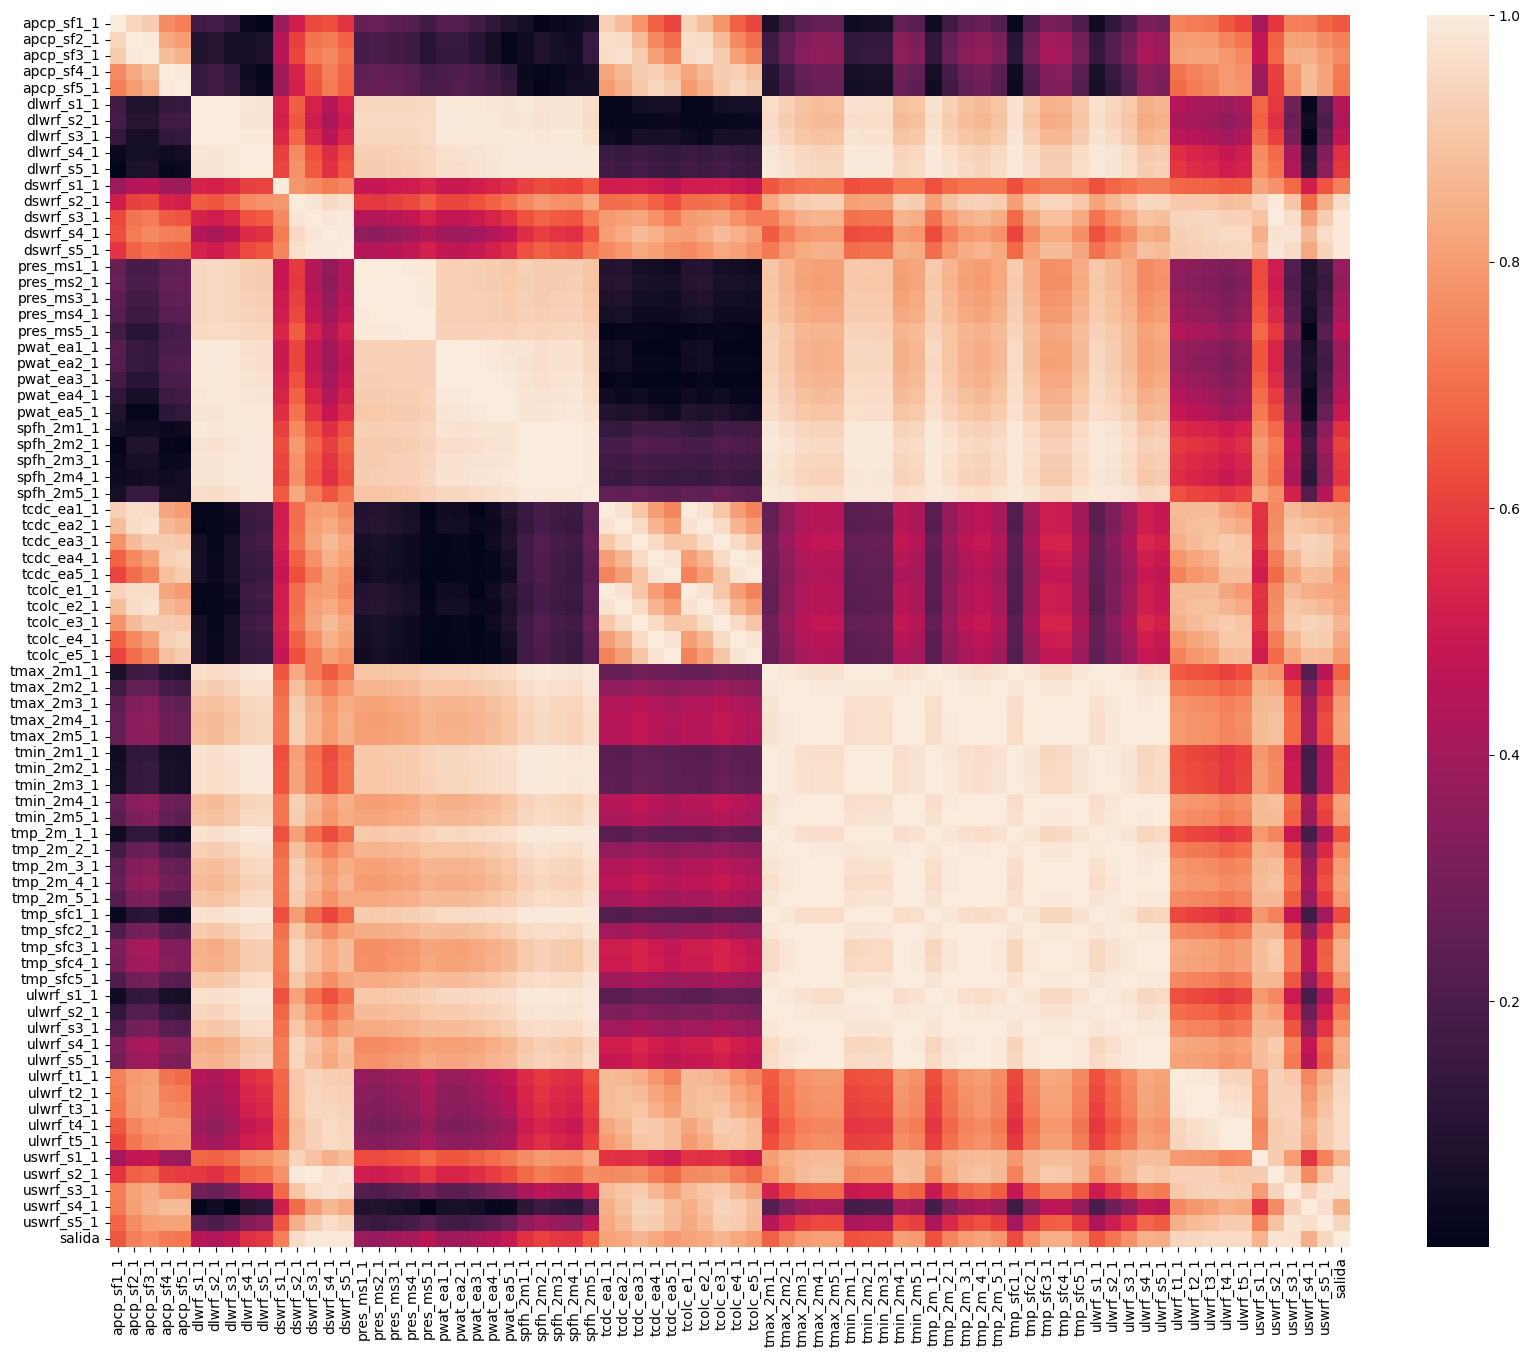

In [16]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.corr().abs())


Vamos a ver las 5 columnas con más correlación con la columna de salida.

In [17]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Vamos a ver también las columnas con menos correlación con la salida

In [18]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=True)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

pres_ms2_1    0.093000
pres_ms3_1    0.114641
pres_ms4_1    0.135502
pwat_ea1_1    0.181912
pwat_ea2_1    0.188039
Name: salida, dtype: float64


Limitamos la matriz al triangulo superior 

In [19]:
upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))
upper

<ipython-input-19-dada363a1d0c>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper= correlacion.where(np.triu(np.ones(correlacion.shape), k=1).astype(np.bool))


,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
apcp_sf1_1,NaN,0.601748,0.543781,0.277655,0.262666,0.264907,0.223553,0.190142,0.102332,0.085999,...,-0.357093,-0.311504,-0.172070,-0.150134,-0.067118,-0.188936,-0.244583,-0.158497,-0.130785,-0.210803
apcp_sf2_1,NaN,NaN,0.944655,0.403267,0.375560,0.218167,0.225368,0.200207,0.125191,0.110740,...,-0.422966,-0.403418,-0.265629,-0.229809,-0.057603,-0.220824,-0.316501,-0.246168,-0.207139,-0.234712
apcp_sf3_1,NaN,NaN,NaN,0.549341,0.485724,0.225110,0.237400,0.214085,0.138392,0.123163,...,-0.431491,-0.427810,-0.325865,-0.286692,-0.044330,-0.223966,-0.342563,-0.298344,-0.253546,-0.261290
apcp_sf4_1,NaN,NaN,NaN,NaN,0.898837,0.214020,0.236931,0.226005,0.180157,0.168973,...,-0.315838,-0.338565,-0.374480,-0.374391,0.007243,-0.137082,-0.252470,-0.312784,-0.281925,-0.257081
apcp_sf5_1,NaN,NaN,NaN,NaN,NaN,0.213648,0.238394,0.227495,0.189047,0.181595,...,-0.320049,-0.347333,-0.389766,-0.404853,-0.000891,-0.145067,-0.256692,-0.320720,-0.299890,-0.268527
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uswrf_s2_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.880281,0.570918,0.721518,0.836513
uswrf_s3_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849519,0.889140,0.785239
uswrf_s4_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.955342,0.594700
uswrf_s5_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.727169


Vamos a crear un diccionario que contenga cada columna, y las columnas con las que ésta está correlacionada

In [20]:
# Crea un diccionario para almacenar las columnas correlacionadas
correlaciones = {}

# Recorre las columnas del DataFrame
for col in datos.columns:
    # Calcula la correlación de la columna actual con las demás columnas
    corr = datos.corrwith(datos[col])

    # Crea una lista de índices de las columnas correlacionadas
    correlacion_idx = corr[(corr > 0.95) & (corr.index != col)].index.tolist()

    # Asigna la lista de índices como valor para la clave correspondiente
    correlaciones[col] = correlacion_idx

# Imprime el diccionario con saltos de línea
for k, v in correlaciones.items():
    print(f"{k}: {v}\n")

apcp_sf1_1: []

apcp_sf2_1: []

apcp_sf3_1: []

apcp_sf4_1: []

apcp_sf5_1: []

dlwrf_s1_1: ['dlwrf_s2_1', 'dlwrf_s3_1']

dlwrf_s2_1: ['dlwrf_s1_1', 'dlwrf_s3_1']

dlwrf_s3_1: ['dlwrf_s1_1', 'dlwrf_s2_1', 'dlwrf_s4_1', 'dlwrf_s5_1']

dlwrf_s4_1: ['dlwrf_s3_1', 'dlwrf_s5_1']

dlwrf_s5_1: ['dlwrf_s3_1', 'dlwrf_s4_1']

dswrf_s1_1: []

dswrf_s2_1: ['dswrf_s3_1', 'uswrf_s2_1']

dswrf_s3_1: ['dswrf_s2_1', 'uswrf_s2_1']

dswrf_s4_1: ['dswrf_s5_1']

dswrf_s5_1: ['dswrf_s4_1']

pres_ms1_1: ['pres_ms2_1', 'pres_ms3_1']

pres_ms2_1: ['pres_ms1_1', 'pres_ms3_1', 'pres_ms4_1']

pres_ms3_1: ['pres_ms1_1', 'pres_ms2_1', 'pres_ms4_1', 'pres_ms5_1']

pres_ms4_1: ['pres_ms2_1', 'pres_ms3_1', 'pres_ms5_1']

pres_ms5_1: ['pres_ms3_1', 'pres_ms4_1']

pwat_ea1_1: ['pwat_ea2_1', 'pwat_ea3_1']

pwat_ea2_1: ['pwat_ea1_1', 'pwat_ea3_1', 'pwat_ea4_1']

pwat_ea3_1: ['pwat_ea1_1', 'pwat_ea2_1', 'pwat_ea4_1', 'pwat_ea5_1']

pwat_ea4_1: ['pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea5_1']

pwat_ea5_1: ['pwat_ea3_1', 'pwat_ea4

##Outliers

En este apartado veremos los outliers de los datos disponibles. Se hacen dos pruebas buescando los outliers entre salida y otra de las variables, basandonos en el heatmap hecho anteriormente.

En la primera prueba se puede observar que hay una gran diferencia entre el límite superior e inferior, sabiendo que este atributo está poco correlado.

En la segunda prueba pasa lo contrario, los datos están muy correlados y por tanto la franja entre el límite superior e inferior es muy pequeña.

In [21]:
outliers = []
#Función para detección de outliers
def find_outliers(datos):
  data_std = datos.std()
  data_mean = datos.mean()
  outlier_cut_off = data_std * 2
  lower_limit = data_mean - outlier_cut_off
  upper_limit = data_mean + outlier_cut_off
  print(lower_limit.iloc[0])
  print(upper_limit.iloc[0])

  #Generate outliers
  for index, row in datos.iterrows():
    anomaly = row #obtenemos la primera columna
    if (anomaly.iloc[0] > upper_limit.iloc[0]) or (anomaly.iloc[0] < lower_limit.iloc[0]):
      outliers.append(index)
  
  return outliers

In [22]:
find_outliers(datos.set_index('salida')[['dswrf_s3_1']])

42.47601434120821
721.0016527405685


[1246500,
 2410200,
 1387800,
 4713600,
 1370700,
 5687100,
 1364100,
 812400,
 1951800,
 1238700,
 1695300,
 3034200,
 819300,
 1204800,
 3210300,
 1117500,
 5744700,
 1376400,
 3296100,
 861000,
 5763900,
 1889700,
 579600,
 1373100,
 2469000,
 2376600,
 2787000,
 2070300,
 936000,
 1293900,
 958800,
 2185800,
 2463000]

In [23]:
find_outliers(datos.set_index('salida')[['pres_ms2_1']])

100392.29656942967
103234.40794391873


[1246500,
 2410200,
 1387800,
 4713600,
 1370700,
 5687100,
 1364100,
 812400,
 1951800,
 1238700,
 1695300,
 3034200,
 819300,
 1204800,
 3210300,
 1117500,
 5744700,
 1376400,
 3296100,
 861000,
 5763900,
 1889700,
 579600,
 1373100,
 2469000,
 2376600,
 2787000,
 2070300,
 936000,
 1293900,
 958800,
 2185800,
 2463000,
 7300800,
 11538600,
 10642800,
 7744200,
 12014700,
 12647700,
 16540800,
 18126600,
 7092900,
 22848000,
 10392600,
 11742600,
 10438800,
 1502700,
 15774300,
 17441400,
 18007500,
 8469600,
 4205700,
 20384100,
 20690400,
 19435200,
 22902900,
 5832900,
 22794300,
 16189800,
 27989100,
 21205800,
 7797000,
 21590100,
 16225800,
 14572500,
 14883300,
 6758100,
 9026100,
 11577600,
 11128800,
 12119700,
 3039000,
 14146200,
 5683500,
 10779600,
 15336600,
 16408800,
 14487000,
 11976300,
 20482500,
 20751300,
 21121500,
 19733700,
 3051300,
 21908400,
 25302900,
 22050000,
 3253200,
 22494600,
 2186400,
 1821300,
 1364100,
 11685000,
 11086500,
 7073400,
 6918000,
 5

##Clustering

El clustering es una técnica en la que se agrupan datos similares en clusters. Con el clustering intentaremos encontrar patrones ocultos con los que se agruparán los distintos datos.

El print imprime la suma acumulada de la varianza explicada por cada uno de los componentes principales, indica cuanta información se conserva tras reducir la dimensionalidad

In [24]:
model = TSNE(n_components = 2, random_state = 0, perplexity = 50)
x = datos
tsne = model.fit_transform(x)

std = StandardScaler()
s = std.fit_transform(x)
pca = PCA(n_components = 25)
pca.fit(s)
pc = pca.transform(s)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(pc)

fr = pd.DataFrame({'tsne1':tsne[:,0], 'tsne2': tsne[:,1], 'cluster':kmeans.labels_})
sns.lmplot(data = fr, x = 'tsne1', y = 'tsne2', hue = 'cluster', fit_reg = False)
print(np.sum(pca.explained_variance_ratio_))

KeyboardInterrupt: ignored

##Transformación Johnson
Este código define dos funciones para aplicar la transformación de Johnson y luego invertirla. Se usa para encontrar una distribución normal o una distribución que se asemeje para unos datos que no siguen una distribución normal.

In [ ]:
y = datos['salida'].values
def johnson(y):
  gamma, eta, epsilom, lbda = st.johnsonsu.fit(y)
  yt = gamma + eta * np.arcsinh((y-epsilom)/lbda)
  return yt, gamma, eta, epsilom, lbda

def johnson_inverse(y, gamma, eta, epsilom, lbda):
  return lbda*np.sinh((y-gamma)/eta) + epsilom

yt ,g , et, ep, l = johnson(y)
yt2 = johnson_inverse(yt, g, et, ep, l)
plt.figure(1)
sns.distplot(yt)
plt.figure(2)
sns.displot(yt2)

#Métodos básicos

##Division de los datos en train-test siendo train 10 años y test 2 años

In [25]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


##KNN

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [26]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

#ajustamos los datos a la pipeline
start = time.time() 
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE of the tree: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo KNN: {mae}")



Execution time: 0.0266268253326416 seconds
RMSE of the tree: 3634700.7339596236
MAE del modelo KNN: 2576600.074520548


A continuacion comprobaremos KNN con varios hiperpárametros diferentes

In [27]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Fitting 1 folds for each of 11 candidates, totalling 11 fits
Execution time: 1.2761740684509277 seconds
RMSE of the tree : 3431363.1618326935
MAE of the tree : 11774253148382.46


Hemos realizado la cross validation probando con una lista de vecinos, en la cual el numero mas alto era 9. Al haber sido este, el mejor valor para los vecinos propuestos, procedemos a aumentar los numeros de la lista, esperando encontrar un número mayor más óptimo


##Arboles de decisión

A continuación se evaluará el modelo de árboles de decisión con los hiperparámetros por omision

In [28]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())


np.random.seed(27) # reproducibility

#ajustamos los datos a la pipeline 
start = time.time()
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE of the tree: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo KNN: {mae}")



Execution time: 0.3987903594970703 seconds
RMSE of the tree: 4279973.04174393
MAE del modelo KNN: 3009932.8767123288


Ahora veremos qué hiperparámetros son los mejores utilizando la técnica de gridSearch 


In [29]:
# Search space
param_grid = {'max_depth': list(range(2,10)),
              'min_samples_split': list(range(2,10))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Fitting 1 folds for each of 64 candidates, totalling 64 fits
Execution time: 8.1410231590271 seconds
RMSE of the tree : 3578304.8192169834
MAE of the tree : 12804265379231.488


Vamos a probar otro método para ajustar los hiperparámetros llamado randomSearch

In [30]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Execution time: 6.916605234146118 seconds
RMSE of the tree : 3801988.296426137
MAE of the tree : 14455115006161.32


##Regresión lineal
A continuación probaremos a hacer un modelo de regresión lineal por omisión

In [31]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())

np.random.seed(27)

start = time.time()
regr.fit(X_train_train, y_train_train)
end = time.time()
total = end - start

# Evaluate the model
y_pred = regr.predict(X_train_val)
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
mae = mean_absolute_error(y_train_val, y_pred)

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {rmse}")
print(f"MAE of the tree : {mae}")




KeyboardInterrupt: ignored

In [ ]:
regr.plot_model()

Regresión lineal con ajuste de hiperparámetros

In [ ]:
# Search space
#param_grid = {'max_depth': list(range(2,10)),
#              'min_samples_split': list(range(2,10))}

#array_fold = [-1]*2920 + [0]*730
#inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
#regr = GridSearchCV(LinearTreeRegressor(base_estimator = LinearRegression()), 
#                   param_grid,
 #                  scoring='neg_mean_squared_error',
  #                 cv=inner, 
   #                n_jobs=1, verbose=1)

param_grid = {'max_depth': list(range(2,16,1))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()), param_grid,
                    scoring='neg_mean_squared_error', cv=inner, n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(27)

start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Tas esperar 15 minutos, hemos llegado a la conclusión de que merece la pena parar la operación y seguir con el trabajo, ya que este modelo no nos va a servir si no reducimos la dimensionalidad.

##Conclusiones

Obtener algunas conclusiones, tales como: ¿cuál es el mejor método? ¿Cuál de los métodos básicos de aprendizaje automático es más rápido? ¿Los resultados son mejores que los regresores triviales/naive/baseline? ¿El ajuste de hiperparámetros mejora con respecto a los valores por omisión? ¿Hay algún equilibrio entre tiempo de ejecución y mejora de resultados? Etc

Como podemos ver en los tiempos de ejecución de los modelos, los modelos de knn por omisión y árboles de decisión por omisión han sido los más rápidos, ya que han tardado una fracción de segundo. Esto se debe a que el modelo tiene que realizar muchos menos calculos y tiene muchas menos interacciones.

#Dimensionalidad

Para ver si se puede reducir la dimensionalidad, tenemos que tener en cuenta a lo que a esto se refiere.
La reducción de dimensionalidad trata de hacer un problema menos complejo sin empeorar los resultados.

Esto lo podemos conseguir de forma facil. Un ejemplo de ello sería comprobar la correlación de las distintas columnas, o ver si hay columnas con datos nulos.

In [32]:
pd.options.display.max_rows = 100
datos

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s1_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,246.504475,250.123907,256.887859,252.522390,0.0,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,205.821899,202.754549,190.833872,193.689280,0.0,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,232.919646,234.298932,207.450058,201.529466,0.0,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,231.098594,234.944027,247.745764,241.867405,0.0,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,228.161205,229.680077,246.582735,245.473409,0.0,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,244.348444,237.416203,184.462400,184.607586,0.0,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.674612,249.425982,259.792969,256.932908,0.0,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,227.978506,236.917554,268.096311,269.024766,0.0,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,262.343628,256.254039,263.650323,268.711556,0.0,10.909091,46.181818,94.363636,61.727273,11154900


##Columnas con muchos ceros

Anteriormente habíamos calculado el número de ceros de cada columna, lo vamos a recuperar y decidiremos si quitamos alguno de esas columnas.

In [33]:
ceros

{'apcp_sf1_1': 2534,
 'apcp_sf2_1': 2490,
 'apcp_sf3_1': 2312,
 'apcp_sf4_1': 2631,
 'apcp_sf5_1': 2480,
 'dlwrf_s1_1': 0,
 'dlwrf_s2_1': 0,
 'dlwrf_s3_1': 0,
 'dlwrf_s4_1': 0,
 'dlwrf_s5_1': 0,
 'dswrf_s1_1': 3822,
 'dswrf_s2_1': 3,
 'dswrf_s3_1': 0,
 'dswrf_s4_1': 0,
 'dswrf_s5_1': 0,
 'pres_ms1_1': 0,
 'pres_ms2_1': 0,
 'pres_ms3_1': 0,
 'pres_ms4_1': 0,
 'pres_ms5_1': 0,
 'pwat_ea1_1': 0,
 'pwat_ea2_1': 0,
 'pwat_ea3_1': 0,
 'pwat_ea4_1': 0,
 'pwat_ea5_1': 0,
 'spfh_2m1_1': 0,
 'spfh_2m2_1': 0,
 'spfh_2m3_1': 0,
 'spfh_2m4_1': 0,
 'spfh_2m5_1': 0,
 'tcdc_ea1_1': 1584,
 'tcdc_ea2_1': 1621,
 'tcdc_ea3_1': 1603,
 'tcdc_ea4_1': 1443,
 'tcdc_ea5_1': 1398,
 'tcolc_e1_1': 2,
 'tcolc_e2_1': 4,
 'tcolc_e3_1': 0,
 'tcolc_e4_1': 0,
 'tcolc_e5_1': 1,
 'tmax_2m1_1': 0,
 'tmax_2m2_1': 0,
 'tmax_2m3_1': 0,
 'tmax_2m4_1': 0,
 'tmax_2m5_1': 0,
 'tmin_2m1_1': 0,
 'tmin_2m2_1': 0,
 'tmin_2m3_1': 0,
 'tmin_2m4_1': 0,
 'tmin_2m5_1': 0,
 'tmp_2m_1_1': 0,
 'tmp_2m_2_1': 0,
 'tmp_2m_3_1': 0,
 'tmp_2m_4_1'

Las columnas con más del 75% de ceros son :
dswrf_s1_1 y uswrf_s1_1. Estas serán borradas en el próximo apartado para poder seguir teniendo en cuenta todas las columnas.

##Correlación

Primero vamos a volver a ver todos los datos en una gráfica

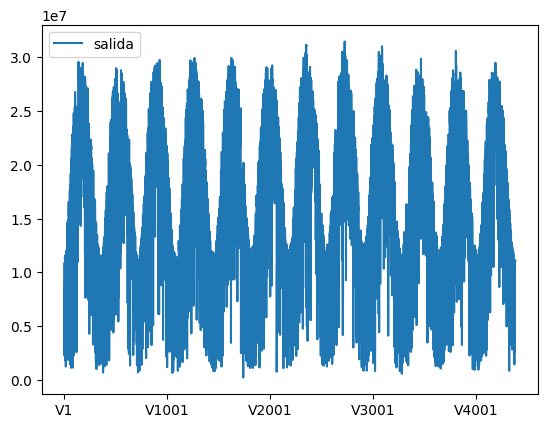

In [34]:
# Crear el gráfico
datos[['salida']].plot()
# Mostrar el gráfico
plt.show()

Tras comprobar anteriormente las 5 columnas con más correlación con la columna de salida, vamos a verlas de nuevo. Esto nos servirá para determinar si estas han cambiado tras hacer drop de las columnas

In [35]:
# Calcular la matriz de correlación
correlaciones = datos.corr()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s5_1    0.862388
dswrf_s4_1    0.857635
uswrf_s2_1    0.836513
dswrf_s2_1    0.817543
Name: salida, dtype: float64


Borramos las columnas con muchos ceros

In [36]:
datos.drop(['uswrf_s1_1','dswrf_s1_1'], axis=1)

,apcp_sf1_1,apcp_sf2_1,apcp_sf3_1,apcp_sf4_1,apcp_sf5_1,dlwrf_s1_1,dlwrf_s2_1,dlwrf_s3_1,dlwrf_s4_1,dlwrf_s5_1,...,ulwrf_t1_1,ulwrf_t2_1,ulwrf_t3_1,ulwrf_t4_1,ulwrf_t5_1,uswrf_s2_1,uswrf_s3_1,uswrf_s4_1,uswrf_s5_1,salida
V1,0.000000,0.000000,0.000000,0.000000,0.000000,279.583582,244.150732,248.810849,260.377672,257.922896,...,192.516803,246.504475,250.123907,256.887859,252.522390,10.000000,46.545455,96.000000,63.000000,10814100
V2,0.000000,0.000000,0.010000,0.056364,0.332727,241.907687,273.096852,289.982095,317.169015,309.656355,...,231.473054,205.821899,202.754549,190.833872,193.689280,3.909091,17.909091,35.909091,24.000000,3524700
V3,0.372727,0.021818,0.044545,0.010000,0.007273,266.370911,248.814203,253.860367,269.438213,262.840130,...,210.473835,232.919646,234.298932,207.450058,201.529466,14.727273,78.363636,156.818182,99.090909,2262300
V4,0.002727,0.004545,0.000000,0.000000,0.000000,246.863048,254.987450,253.493584,243.910921,238.531321,...,227.330324,231.098594,234.944027,247.745764,241.867405,7.545455,38.727273,93.909091,62.363636,2414100
V5,0.000000,0.000000,0.000000,0.000000,0.000000,225.253657,233.381596,241.669004,262.122700,262.209190,...,229.641681,228.161205,229.680077,246.582735,245.473409,9.454545,44.454545,94.818182,62.363636,8925600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
V4376,0.103636,0.031818,0.275455,1.363636,2.723636,290.259560,273.578697,290.364211,336.500117,329.825229,...,224.630457,244.348444,237.416203,184.462400,184.607586,7.454545,29.363636,26.181818,16.181818,2586300
V4377,0.042727,0.011818,0.005455,0.000000,0.000000,281.187456,270.918392,261.076105,257.875871,255.614019,...,245.591119,245.674612,249.425982,259.792969,256.932908,12.181818,57.909091,118.363636,75.909091,7096500
V4378,0.000000,0.000000,0.000000,0.000000,0.000000,258.991619,266.566642,270.990501,285.661122,282.533206,...,240.584692,227.978506,236.917554,268.096311,269.024766,8.272727,44.454545,94.909091,61.909091,10694700
V4379,0.000000,0.000000,0.000000,0.000000,0.000000,267.316595,263.072063,271.107649,292.155748,289.533175,...,268.409674,262.343628,256.254039,263.650323,268.711556,10.909091,46.181818,94.363636,61.727273,11154900


Tras comprobar la correlación al principio del archivo, ahora comprobamos las matrices que hay que borrar.

Tras realizar a mano, las comprobaciones de las columnas que estaban correlacionadas, y tras eliminar una de las 2 que estuvieran correlacionadas, se traslado dicho procedimiento a código

In [37]:
# Lista de columnas a eliminar
cols_to_drop = ['dlwrf_s2_1', 'dlwrf_s3_1', 'dlwrf_s5_1', 'dswrf_s2_1', 'dswrf_s5_1', 'pres_ms2_1', 'pres_ms3_1', 
                'pres_ms4_1', 'pwat_ea2_1', 'pwat_ea3_1', 'pwat_ea4_1', 'spfh_2m2_1', 'spfh_2m3_1', 'spfh_2m4_1', 
                'tcdc_ea1_1', 'tcdc_ea2_1', 'tcdc_ea3_1', 'tcdc_ea4_1', 'tcdc_ea5_1', 'ulwrf_t2_1', 'ulwrf_t4_1', 
                'uswrf_s2_1', 'uswrf_s4_1', 'tmax_2m2_1', 'tmp_2m_2_1', 'tmp_sfc2_1', 'ulwrf_s3_1', 'ulwrf_s2_1', 
                'tmax_2m3_1', 'tmax_2m4_1', 'tmax_2m5_1', 'tmin_2m4_1', 'tmin_2m5_1', 'tmax_2m1_1', 'tmin_2m2_1', 
                'tmin_2m3_1', 'tmp_sfc1_1', 'tmp_2m_3_1', 'tmp_2m_4_1', 'tmp_2m_5_1', 'tmp_sfc3_1', 'tmp_sfc4_1', 
                'tmp_sfc5_1', 'ulwrf_s4_1', 'ulwrf_s5_1', 'tmin_2m1_1', 'tmp_2m_1_1']

# Elimina las columnas especificadas
datos = datos.drop(cols_to_drop, axis=1)

Tras borrar las columnas, vamos a volver a comprobar el resto de columnas, para ver si hay alguna columna que nos hayamos dejado.

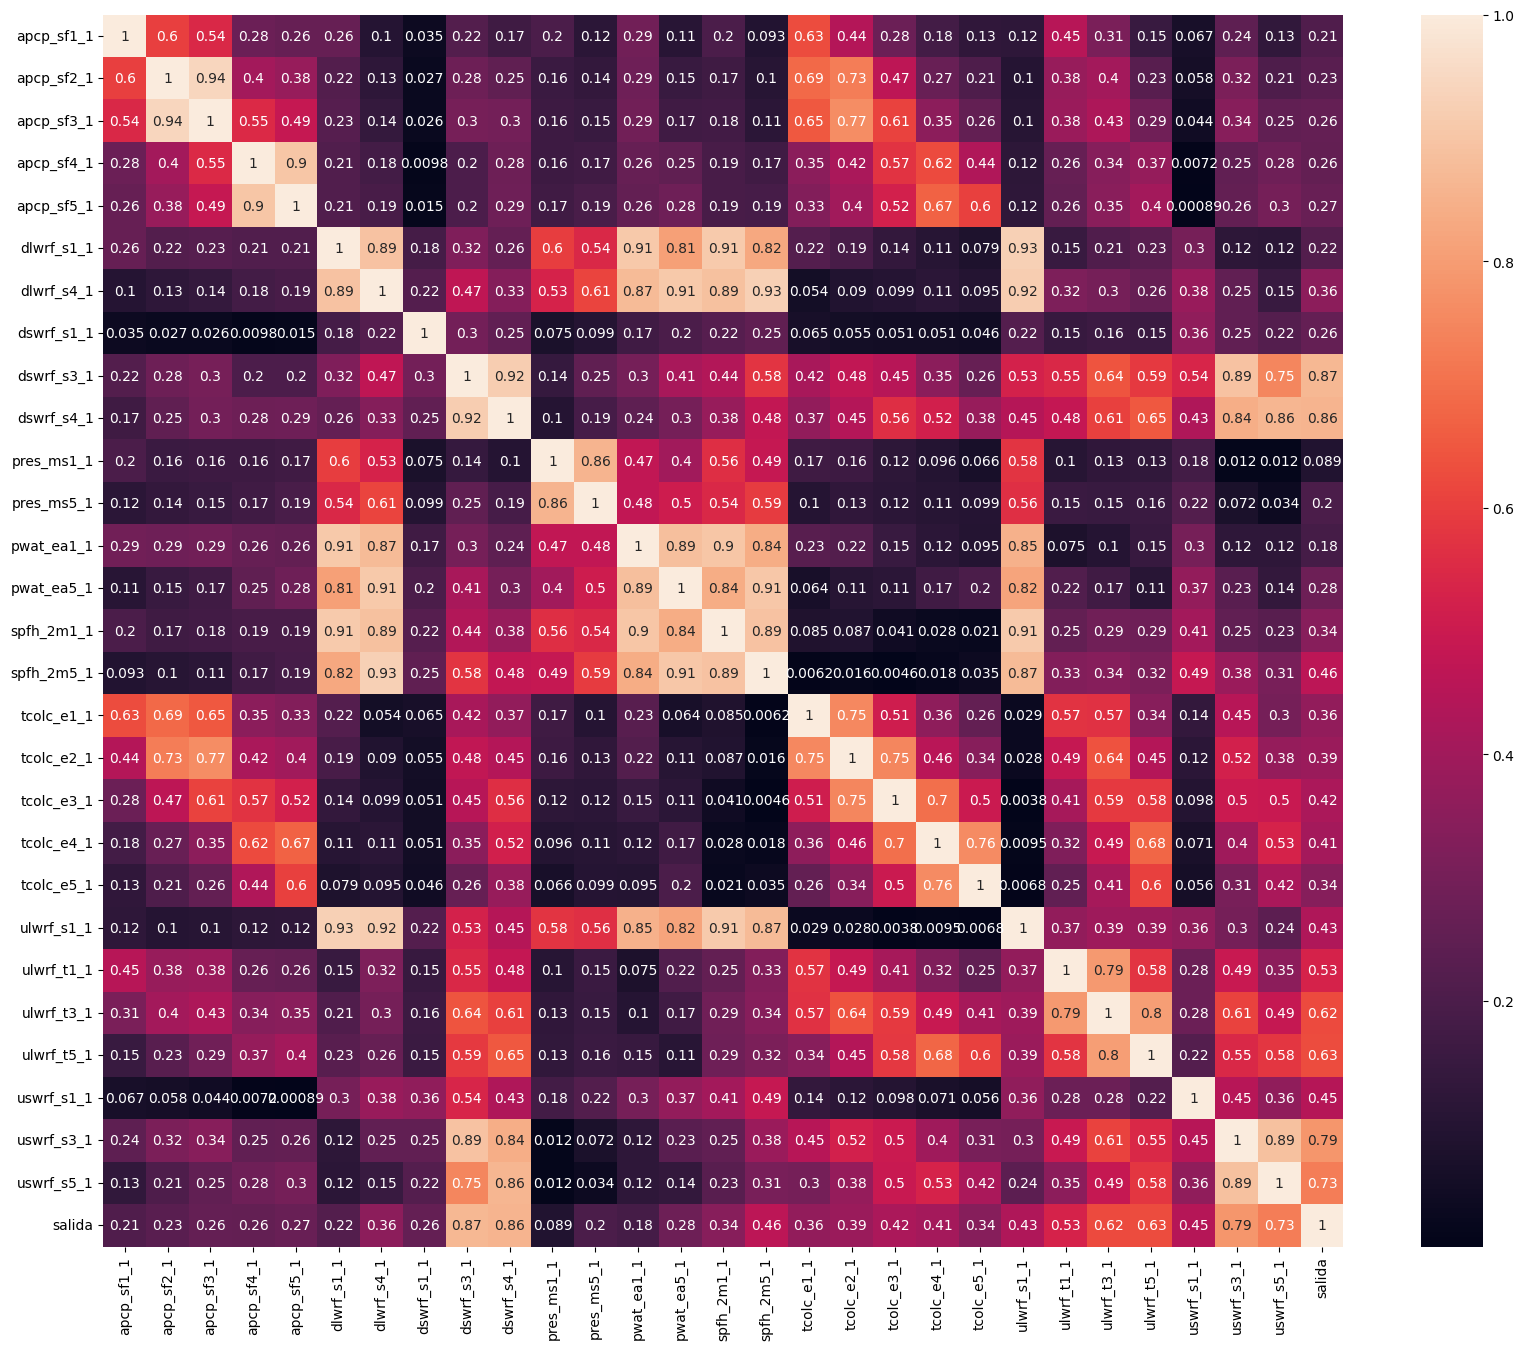

In [38]:
correlacion = datos.corr()
plt.figure(figsize=(20, 16))
plot = sns.heatmap(correlacion.abs(), annot = True)


Tras borrar los datos, volvemos a comprobar las columnas que están más relacionadas.

In [39]:
# Calcular la matriz de correlación
correlaciones = datos.corr().abs()

# Seleccionar la columna de salida y ordenar las correlaciones en orden descendente
corr_salida = correlaciones['salida'].sort_values(ascending=False)

# Tomar las 5 columnas con las correlaciones más altas
top_5 = corr_salida[1:6]  # Excluir la columna de salida

print(top_5)

dswrf_s3_1    0.865622
dswrf_s4_1    0.857635
uswrf_s3_1    0.785239
uswrf_s5_1    0.727169
ulwrf_t5_1    0.628649
Name: salida, dtype: float64


Podemos ver que tres de las columnas más correlacionadas han cambiado, esto se debe a la cantidad de columnas que tenían una correlación mayor a 95

A continuacion se volverá a mostrar la gráfica de los datos

In [ ]:
# Crear el gráfico
datos[['salida']].plot()

# Mostrar el gráfico
plt.show()

Tras esto hemos reducido la dimensionalidad considerablemente, ahora debería ser más rápido y menos complejo.

## Métodos básicos tras reducir la dimensionalidad.

De nuevo tenemos que seccionar el espacio

### Train - Test

In [ ]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


### KNN

A continuación se evaluará el modelo KNN con los hiperparámetros por omision

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

#ajustamos los datos a la pipeline
start = time.time() 
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)

# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE of the tree: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo KNN: {mae}")



A continuacion comprobaremos KNN con varios hiperpárametros diferentes

In [ ]:
pipe = make_pipeline(StandardScaler(), KNeighborsRegressor())

arr = [-1]*2920 + [0]*730

# Define la lista de posibles valores de vecinos
vecinos = [1, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15]

# Utiliza un bucle para evaluar el modelo con diferentes valores de vecinos

inner = PredefinedSplit(test_fold = arr)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(pipe, 
                   param_grid = {'kneighborsregressor__n_neighbors': vecinos},
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)

# Entrena el modelo con el número óptimo de vecinos y evalúa en el conjunto de evaluación
start = time.time()
regr.fit(X = X_train, y = y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Hemos realizado la cross validation probando con una lista de vecinos, en la cual el numero mas alto era 9. Al haber sido este, el mejor valor para los vecinos propuestos, procedemos a aumentar los numeros de la lista, esperando encontrar un número mayor más óptimo


### Arboles de decisión

A continuación se evaluará el modelo de árboles de decisión con los hiperparámetros por omision

In [ ]:
pipe = make_pipeline(StandardScaler(), DecisionTreeRegressor())


np.random.seed(27) # reproducibility

#ajustamos los datos a la pipeline 
start = time.time()
pipe.fit(X_train_train, y_train_train)
end = time.time()
total = end-start

# Predict on the scaled test data
y_pred = pipe.predict(X_train_val)


# Evaluate the model
print(f"Execution time: {total} seconds")
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
print(f"RMSE of the tree: {rmse}")
mae = mean_absolute_error(y_train_val, y_pred)
print(f"MAE del modelo KNN: {mae}")



Ahora veremos qué hiperparámetros son los mejores utilizando la técnica de gridSearch 


In [ ]:
# Search space
param_grid = {'max_depth': list(range(2,10)),
              'min_samples_split': list(range(2,10))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
regr = GridSearchCV(DecisionTreeRegressor(), 
                   param_grid,
                   scoring='neg_mean_squared_error',
                   cv=inner, 
                   n_jobs=1, verbose=1)


# Train the self-adjusting process
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Vamos a probar otro método para ajustar los hiperparámetros llamado randomSearch

In [ ]:
# Search space
param_grid = {'max_depth': list(range(2,16,2)),
              'min_samples_split': list(range(2,16,2))}

# Inner evaluation
inner = KFold(n_splits=3)

budget = 20
regr = RandomizedSearchCV(DecisionTreeRegressor(), 
                         param_grid,
                         scoring='neg_mean_squared_error',
                         cv=inner, 
                         n_jobs=1, verbose=1,
                         n_iter=budget
                        )
np.random.seed(27)
start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

### Regresión lineal
A continuación probaremos a hacer un modelo de regresión lineal por omisión

In [ ]:
regr = LinearTreeRegressor(base_estimator=LinearRegression())

np.random.seed(27)

start = time.time()
regr.fit(X_train_train, y_train_train)
end = time.time()
total = end - start

# Evaluate the model
y_pred = regr.predict(X_train_val)
rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))
mae = mean_absolute_error(y_train_val, y_pred)

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {rmse}")
print(f"MAE of the tree : {mae}")




In [ ]:
regr.plot_model()

Regresión lineal con ajuste de hiperparámetros

In [ ]:
# Search space
#param_grid = {'max_depth': list(range(2,10)),
#              'min_samples_split': list(range(2,10))}

#array_fold = [-1]*2920 + [0]*730
#inner = PredefinedSplit(test_fold = array_fold)

# Definition of a 2-step process that self-adjusts 2 hyperpars
#regr = GridSearchCV(LinearTreeRegressor(base_estimator = LinearRegression()), 
#                   param_grid,
 #                  scoring='neg_mean_squared_error',
  #                 cv=inner, 
   #                n_jobs=1, verbose=1)

param_grid = {'max_depth': list(range(2,16,1))}

array_fold = [-1]*2920 + [0]*730
inner = PredefinedSplit(test_fold = array_fold)

regr = GridSearchCV(LinearTreeRegressor(base_estimator=LinearRegression()), param_grid,
                    scoring='neg_mean_squared_error', cv=inner, n_jobs=1, verbose=1)

# Train the self-adjusting process
np.random.seed(27)

start = time.time()
regr.fit(X_train, y_train)
end = time.time()
total = end-start

print(f"Execution time: {total} seconds")
print(f"RMSE of the tree : {np.sqrt(-regr.best_score_)}")
print(f"MAE of the tree : {-regr.best_score_}")

Pese a poder probar más hiperparámetros como el numero mínimo de particiones, decidimos que el aumento exponencial del tiempo no merecía tanto la pena. Podemos ver, que con solo un hiperparámetro, hemos sufrido la espera de casi 250 segundos.

##Conclusiones

# Métodos avanzados

In [ ]:
X = datos[datos.columns[0:-1]]
y = datos['salida']

X_train = X[0:3650]
y_train = y[0:3650]


X_final_test = X[3651:]
y_final_test = y[3651:]


## SVM

El primer paso para llevar a cabo las SVM es normalizar los datos

In [ ]:
clf = make_pipeline(StandardScaler(), SVC())

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

clf.fit(X_train_train, y_train_train)
y_pred = clf.predict(X_train_val)

rmse = np.sqrt(metrics.mean_squared_error(y_train_val, y_pred))


print(rmse)

In [ ]:
X_train_train.shape
y_train_train.shape

## RandomForests

In [ ]:
model = RandomForestClassifier()

#En el modelo por omision, dividimos de nuevo el conjunto TRAIN en TRAIN TRAIN y TRAIN VAL
X_train_train = X[0:2920]
y_train_train = y[0:2920]

X_train_val = X[2920:3650]
y_train_val = y[2920:3650]

model.fit(X_train_train, y_train_train)




In [ ]:
X_train_val.shape
y_train_val.shape

In [ ]:
print(f'Train Accuracy - : {model.score(X_train_train, y_train_train):.3f}')
print(f'Validation Accuracy - : {model.score(X_train_val, y_train_val):.3f}')


In [ ]:
modelo = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf_Grid = GridSearchCV(estimator = modelo, 
                       param_grid = param_grid, 
                       cv = 10, 
                       verbose=2, 
                       n_jobs = 4)


rf_Grid.fit(X_train, y_train)

print(f"RMSE of the tree : {np.sqrt(-rf_Grid.best_score_)}")

